In [14]:
from sklearn import tree
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import math

import sys
sys.path.insert(1, 'C:\\Users\\cokie\\Workspace\\GithubProjects\\MLPlay')

from Util import PolyVal
from DecisionTree import Curve, NumKnot, SplineOrd0

In [4]:
lims = (0, 2.5)
figSize = (11,6)  # a good size depends on the display

In [6]:
## read in data
dataPath = '..\\data\\'

f = open(dataPath + "Polynomial00_X.txt", 'r')
x_data = f.readlines()
x_data = [float(x.strip()) for x in x_data]
f.close()

f = open(dataPath + "Polynomial00_Y.txt", 'r')
y_data = f.readlines()
y_data = [float(y.strip()) for y in y_data]
f.close()

In [7]:
coef = [1, 0.2, 0.7, 1, -0.5]
quartic_name = "-0.5x^4 + x^3 + 0.7x^2 + 0.2x + 1"

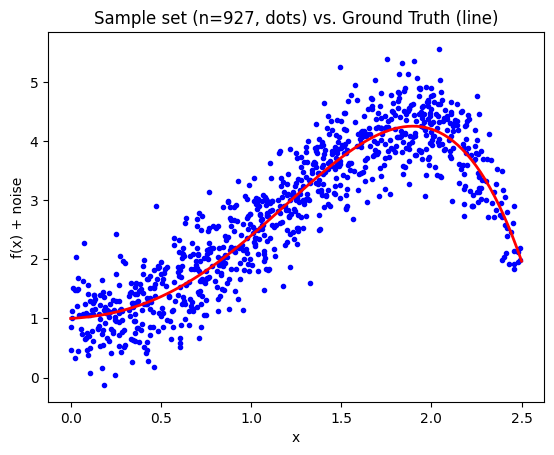

In [8]:
plt.plot(x_data, y_data, 'o', markersize=3, color='blue')

x = np.linspace(0,2.5,100)
y = PolyVal(coef, x)
plt.plot(x, y,  color='red',linewidth=2)

plt.xlabel("x")
plt.ylabel("f(x) + noise")
plt.title("Sample set (n=" + str(len(x_data)) + ", dots) vs. Ground Truth (line)")

plt.show()

In [9]:
x_train, x_test , y_train , y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

trainSize = len(x_train)
testSize = len(x_test)

(834, 1)
(834, 1)
(93, 1)
(93, 1)


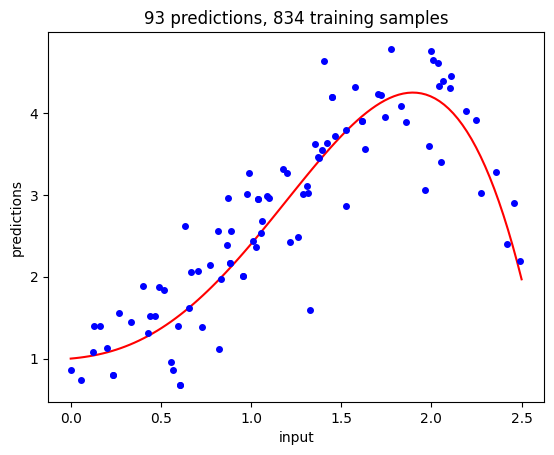

In [12]:
DtRegress = tree.DecisionTreeRegressor()
DtRegress = DtRegress.fit(x_train, y_train)

x = np.linspace(0, 2.5, 100)
plt.plot( x, PolyVal(coef,x), color='red' )

predictions = DtRegress.predict(x_test)
# scatter doesn't accept the markersize argument
plt.plot(x_test, predictions, 'o', color='blue', markersize=4)

plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) + " training samples")

plt.show()

In [13]:
NumKnot(DtRegress.tree_)

833

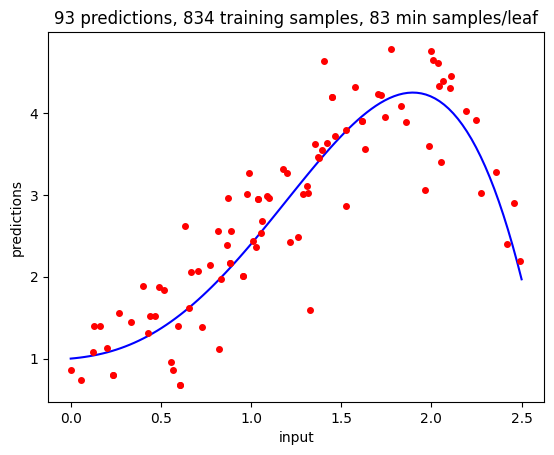

In [15]:
# TODO:  Remove this it's redundant with the next graph

# try again with limits on min_samples_leaf and max_depth
min_samples_leaf = math.floor(0.1*trainSize)

clf = tree.DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
clf = clf.fit(x_train, y_train)

plt.plot( x, PolyVal(coef,x), color='blue' )

predictions = DtRegress.predict(x_test)
plt.plot(x_test, predictions, 'o', color='red', markersize=4)

plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) +
          " training samples, " + str(min_samples_leaf) + " min samples/leaf")

plt.show()

In [16]:
numKnot = NumKnot(DtRegress.tree_)
numKnot

833

In [17]:
spline = SplineOrd0(DtRegress.tree_)

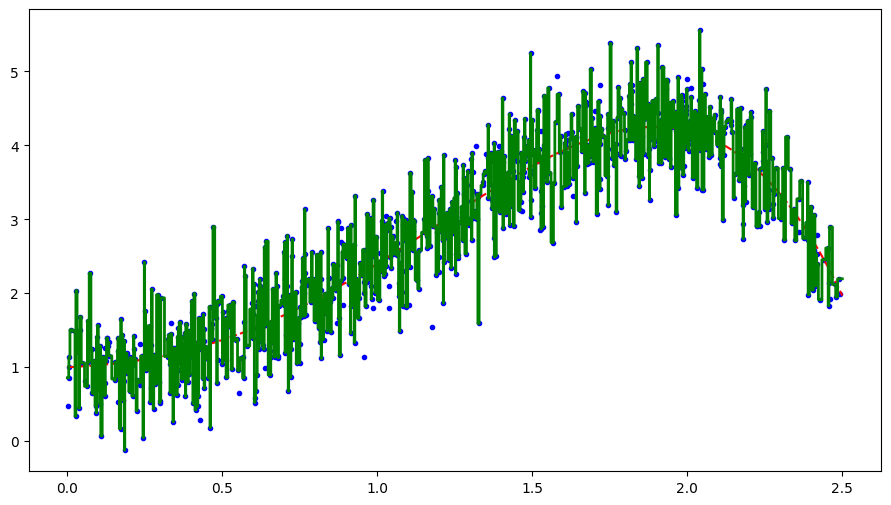

In [18]:
# TODO:  Make this graph into a function definition at the top of the notebook and use it everywhere

fig,ax = plt.subplots(figsize=(11,6))

curve = Curve(spline, (0,2.5))
x = [p[0] for p in curve] 
y = [p[1] for p in curve]
plt.plot(x,y, color='green', linewidth=2, zorder=1)

plt.plot(x_data, y_data, 'o', markersize=3, color='blue', zorder=-1)

x = np.linspace(0,2.5,100)
y = PolyVal(coef,x)
plt.plot(x, PolyVal(coef,x), '--', color='red', zorder=0)

# title should be added by the caller, but labels could be added here

# SVG is better for publication, but PNG is easier for exploration, caller should specify
plt.savefig(f'dt_{numKnot + 1}_bin.png')

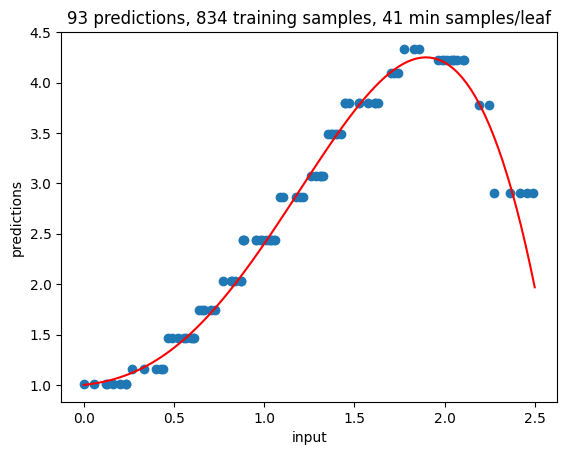

In [23]:
# try again, limiting min samples per leaf to be 5% of total leafs
min_samples_leaf = math.floor(0.05*trainSize)

clf = tree.DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
clf = clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

plt.plot( x, PolyVal(coef,x), color='red' )
plt.scatter( x_test, predictions )
plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) + " training samples, "
          + str(min_samples_leaf) + " min samples/leaf")

plt.show()

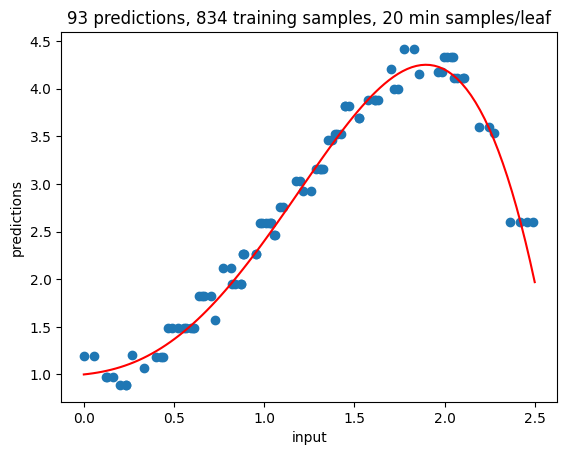

In [22]:
# try again, limiting min samples per leaf to be 2.5% of total leafs
min_samples_leaf = math.floor(0.025*trainSize)

clf = tree.DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
clf = clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

plt.plot( x, PolyVal(coef,x), color='red' )
plt.scatter( x_test, predictions )
plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) + " training samples, "
          + str(min_samples_leaf) + " min samples/leaf")

plt.show()

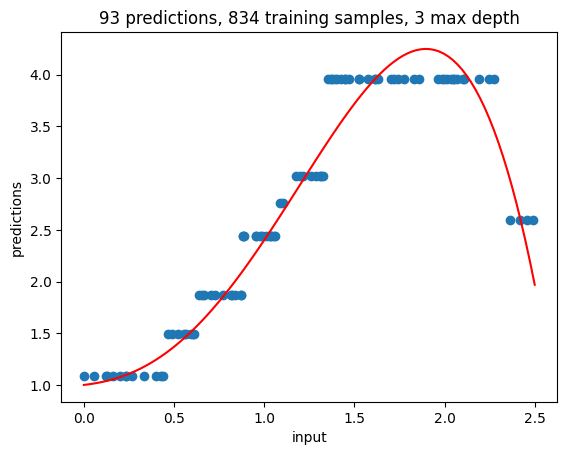

In [21]:
# try again, limiting tree depth to 3
max_depth = 3

clf = tree.DecisionTreeRegressor(max_depth=max_depth)
clf = clf.fit(x_train, y_train)

predictions = clf.predict(x_test)

plt.plot( x, PolyVal(coef,x), color='red' )
plt.scatter( x_test, predictions )
plt.xlabel("input")
plt.ylabel("predictions")
plt.title(str(testSize) + " predictions, " + str(trainSize) + " training samples, "
          + str(max_depth) + " max depth")

plt.show()